**By the end of the lab, you will:**

- Submit code implementations for Batch GD and SGD.
- Present plots comparing convergence behavior of both methods.
- Submit a short reflection on the differences observed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

## Step 1: Introduction to Linear Predictors and Loss Functions

### Linear Predictor:
$$\hat{y} = w \cdot x + b$$

### Loss Function: Mean Squared Error (MSE)
$$L(w, b) = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2$$

### Discussion:
Loss minimization is critical for training predictors because it provides a measure of how well the model's predictions align with the actual outcomes. By minimizing the loss, we ensure the model generalizes better to unseen data, leading to improved accuracy and performance.


## Step 2: Brief on Stochastic Gradient Descent

### Gradient Descent:
Updates weights by minimizing the loss:
$$w = w - \eta \cdot \frac{\partial L}{\partial w}$$

### Stochastic Gradient Descent (SGD):
Updates weights incrementally using a single data point:
$$w = w - \eta \cdot \frac{\partial L_i}{\partial w}$$


## Step3: Data Generation

In [ ]:
np.random.seed(42)
n_samples = 100

X = 2* np.random.rand( 100,1)

y = 4 + 3*X + np.random.randn(n_samples,1)

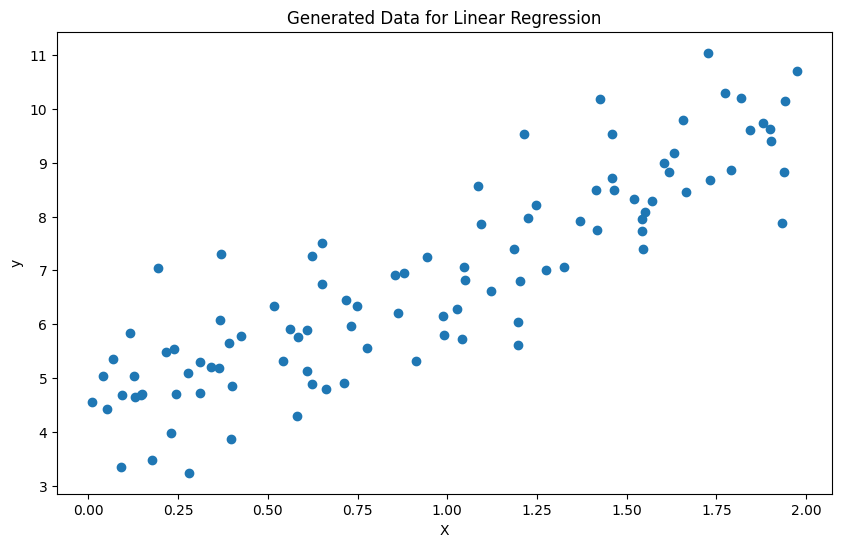

In [ ]:
# plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Generated Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Step4: Implementing Batch Gradient Descend

#I need (X,y)

$Loss =  \frac{1}{N}\Sigma_{i=1}^{N}(y_i - (wx+b))^2$


$\frac{\partial Loss}{\partial w} = \frac{\partial \frac{1}{N} \Sigma_{i=1}^{N}(y_i - wx)^2}{\partial w}$

$ Gradient_w = -\frac{2}{N} \Sigma_{i=1}^{N}(y_i - wx)X$

$\frac{\partial Loss}{\partial b} = \frac{\partial \frac{1}{N} \Sigma_{i=1}^{N}(y_i - (wx+b))^2}{\partial b}$

$ Gradient_b = -\frac{2}{N} \Sigma_{i=1}^{N}(y_i - (wx+b))$

$w_{new} = w_{old}-\eta \frac{1}{N} \Sigma_{i=1}^{N}2(y_i - wx)X$

In [ ]:
w = np.random.randn(1)
b = np.random.randn(1)
print(w,b)

[0.01300189] [1.45353408]


In [ ]:
LR = 0.01

In [ ]:
n = 1000

In [ ]:
N = len(X)

In [ ]:
for i in range(n):
    yhat = w * X + b
    loss = (1/N) * np.sum((y-yhat)**2)

    dw = -(2/N)* np.sum((y-yhat)*X)
    db = -(2/N)* np.sum((y-yhat))

    w = w-LR*dw
    b = b-LR*db

    if (i%10==0)&(i<=100) :
        print(f'Iteration{i}: Loss = {loss}')
print(f'Final Weight(w) :{w}, Final bias(b): {b}')

Iteration0: Loss = 32.138586076383035
Iteration10: Loss = 14.290110205649821
Iteration20: Loss = 6.611726403379552
Iteration30: Loss = 3.308328296738578
Iteration40: Loss = 1.8869794105294073
Iteration50: Loss = 1.2752686205342254
Iteration60: Loss = 1.0118655449910001
Iteration70: Loss = 0.8983141942359012
Iteration80: Loss = 0.8492417885011365
Iteration90: Loss = 0.8279216814213755
Iteration100: Loss = 0.8185538564218228
Final Weight(w) :[2.77553086], Final bias(b): [4.20896047]


In [ ]:
yhat = w * X + b
yhat.shape, X.shape

((100, 1), (100, 1))

## Step5: Implementing Stochastic Gradient Descent

In [ ]:
np.random.seed(42)

# initialize parameters
w_sgd = np.random.randn(1)  # initial weight
b_sgd = np.random.randn(1)  # initial bias
print(f"Initial w: {w_sgd}, Initial b: {b_sgd}")


LR_sgd = 0.01
n_epochs = 50
N = len(X)

losses_sgd = []

for epoch in range(n_epochs):

    indices = np.random.permutation(N)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    epoch_loss = 0

    for i in range(N):
        xi = X_shuffled[i]
        yi = y_shuffled[i]

        yhat_i = w_sgd * xi + b_sgd

        loss_i = (yi - yhat_i) ** 2
        epoch_loss += loss_i

        dw_i = -2 * (yi - yhat_i) * xi
        db_i = -2 * (yi - yhat_i)

        w_sgd = w_sgd - LR_sgd * dw_i
        b_sgd = b_sgd - LR_sgd * db_i

    epoch_loss /= N
    losses_sgd.append(epoch_loss[0])

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss[0]}")

print(f"Final SGD Weight (w): {w_sgd}, Final SGD Bias (b): {b_sgd}")

Initial w: [0.49671415], Initial b: [-0.1382643]
Epoch 0: Loss = 6.861868368898772
Epoch 10: Loss = 0.8258551312722225
Epoch 20: Loss = 0.8394207927609483
Epoch 30: Loss = 0.835095809654002
Epoch 40: Loss = 0.8259541283515368
Final SGD Weight (w): [2.77132293], Final SGD Bias (b): [4.23702245]
